In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define latent dimension for the generator input
latent_dim = 100

# Fetch historical data for the 10-year U.S. Treasury yield (interest rate proxy)
ticker = '^TNX'  # Symbol for the 10-year U.S. Treasury yield (in percentage)
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

# Use the 'Adj Close' as the interest rate (percentage)
interest_rates = data['Adj Close']

# Normalize the interest rates for GAN
interest_rates_normalized = (interest_rates - interest_rates.mean()) / interest_rates.std()
interest_rates_normalized = interest_rates_normalized.values.reshape(-1, 1)

# Build the Generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='tanh'))  # Output is one interest rate value
    return model

# Build the Discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability of real or fake
    return model

# Build the GAN (combining generator and discriminator)
def build_gan(generator, discriminator):
    # Freeze discriminator when training the generator
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the models
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

generator = build_generator(latent_dim)

# The GAN model combines the generator and the discriminator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Hyperparameters
batch_size = 32
epochs = 10000
half_batch = batch_size // 2


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[*********************100%***********************]  1 of 1 completed


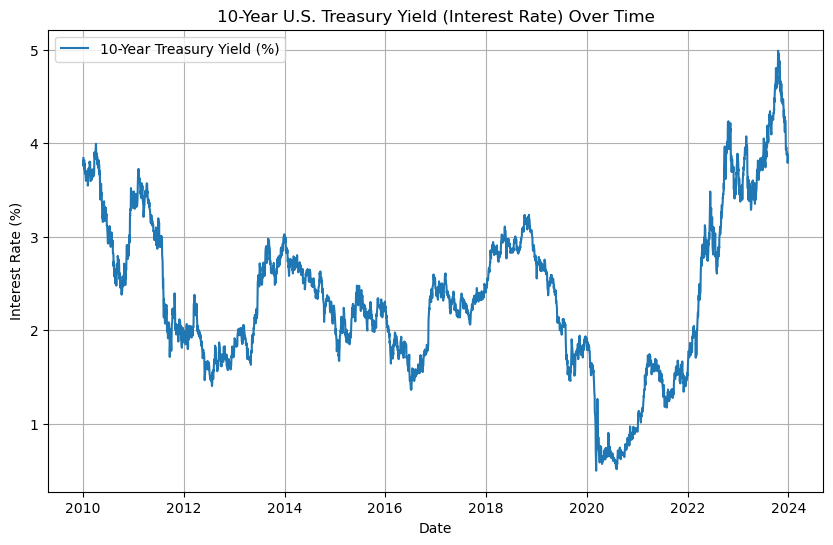

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define latent dimension for the generator input
latent_dim = 100

# Fetch historical data for the 10-year U.S. Treasury yield (interest rate proxy)
ticker = '^TNX'  # Symbol for the 10-year U.S. Treasury yield (in percentage)
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

# Use the 'Adj Close' as the interest rate (percentage)
interest_rates = data['Adj Close']

# Normalize the interest rates for GAN
interest_rates_normalized = (interest_rates - interest_rates.mean()) / interest_rates.std()
interest_rates_normalized = interest_rates_normalized.values.reshape(-1, 1)

# Plot the interest rates
plt.figure(figsize=(10, 6))
plt.plot(data.index, interest_rates, label="10-Year Treasury Yield (%)")
plt.title('10-Year U.S. Treasury Yield (Interest Rate) Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.savefig("10_year_treasury_yield.png", dpi=300)  # Adjust dpi for quality if needed

plt.show()


2025-01-19 19:33:48.387361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737333228.626550 2533917 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737333228.664683 2533917 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 19:33:49.147093: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/j/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Error during discriminator training: 'NoneType' object has no attribute 'update_state'

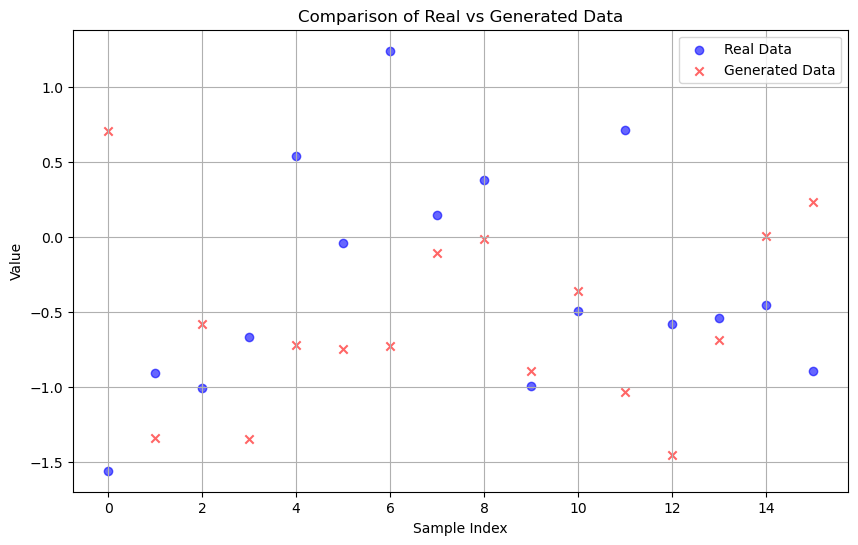

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Set the latent dimension for the generator input
latent_dim = 100

# Build the Generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='tanh'))  # Output is a single value (e.g., a number)
    return model

# Build the Discriminator model
def build_discriminator():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability of real or fake
    return model

# Build the GAN (combining the generator and the discriminator)
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator weights during GAN training
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Initialize the models
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

generator = build_generator(latent_dim)

# Create the GAN by combining the generator and discriminator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Hyperparameters
batch_size = 32
epochs = 101
half_batch = batch_size // 2

# Training loop
for epoch in range(epochs):
    # Generate random data for real (normal distribution) and fake (from generator)
    real_data = np.random.normal(0, 1, (half_batch, 1))  # Random "real" data (for simplicity)
    
    # Check if real_data contains NaN or Inf values
    if np.any(np.isnan(real_data)) or np.any(np.isinf(real_data)):
        print("Warning: real_data contains NaN or Inf")
        continue

    # Noise for generator (input to generator)
    noise = np.random.normal(0, 1, (half_batch, latent_dim))  # Random noise for the generator
    fake_data = generator.predict(noise)  # Generate fake data from noise

    # Ensure fake data is also valid
    if np.any(np.isnan(fake_data)) or np.any(np.isinf(fake_data)):
        print("Warning: fake_data contains NaN or Inf")
        continue

    # Labels for real and fake data
    real_labels = np.ones((half_batch, 1))  # Real data labeled as 1
    fake_labels = np.zeros((half_batch, 1))  # Fake data labeled as 0

    # Train the discriminator with real and fake data
    try:
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
    except Exception as e:
        print(f"Error during discriminator training: {e}")
        continue

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # Combine losses

    # Train the generator via the GAN (the goal is to fool the discriminator into thinking fake data is real)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))  # Generate random noise
    valid_labels = np.ones((batch_size, 1))  # We want to fool the discriminator into thinking it's real

    try:
        g_loss = gan.train_on_batch(noise, valid_labels)
    except Exception as e:
        print(f"Error during generator training: {e}")
        continue

    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {d_loss[1]*100}%] [G loss: {g_loss}]")

# Generate synthetic data after training
noise = np.random.normal(0, 1, (1000, latent_dim))  # Generate synthetic samples
synthetic_data = generator.predict(noise)

# Rescale back to the range of real data (adjust as needed based on your data range)
synthetic_data_rescaled = synthetic_data * 2  # Adjust as needed based on your data range

# Plot real vs synthetic data
plt.figure(figsize=(10, 6))

# Plot real data as a scatter plot
plt.scatter(np.arange(half_batch), real_data, label='Real Data', alpha=0.6, color='blue')

# Plot synthetic (generated) data as a scatter plot
plt.scatter(np.arange(half_batch), synthetic_data_rescaled[:half_batch], label='Generated Data', alpha=0.6, color='red', marker='x')

plt.title('Comparison of Real vs Generated Data')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.savefig("real_vs_generated_data_4.png", dpi=300)
plt.show()


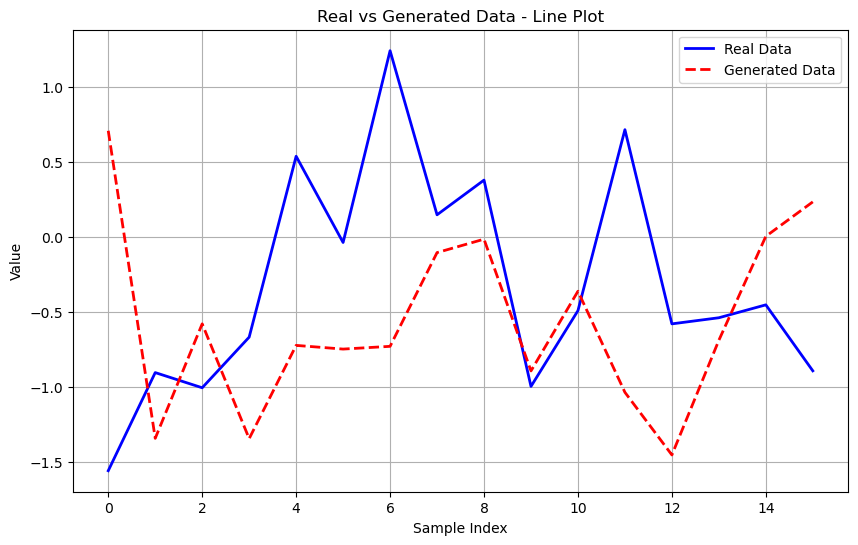

In [3]:
# Plot real vs synthetic data using line plots
plt.figure(figsize=(10, 6))

# Plot real data as a line plot
plt.plot(np.arange(half_batch), real_data, label='Real Data', color='blue', linewidth=2)

# Plot synthetic (generated) data as a dashed line plot
plt.plot(np.arange(half_batch), synthetic_data_rescaled[:half_batch], label='Generated Data', linestyle='--', color='red', linewidth=2)

plt.title('Real vs Generated Data - Line Plot')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig("real_vs_generated_data.png", dpi=300)
plt.show()


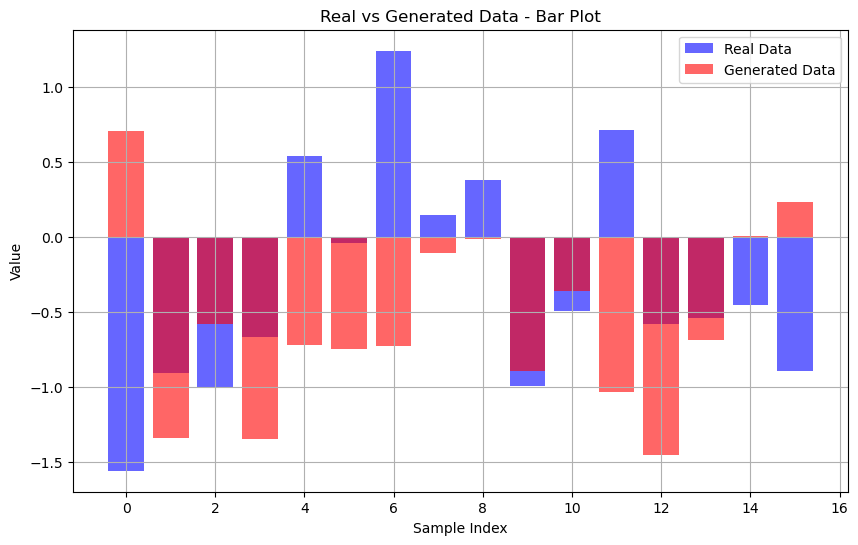

In [4]:
# Plot real vs synthetic data using bar plots
plt.figure(figsize=(10, 6))

# Bar plot for real data
plt.bar(np.arange(half_batch), real_data.flatten(), label='Real Data', alpha=0.6, color='blue')

# Bar plot for synthetic (generated) data
plt.bar(np.arange(half_batch), synthetic_data_rescaled[:half_batch].flatten(), label='Generated Data', alpha=0.6, color='red')

plt.title('Real vs Generated Data - Bar Plot')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig("real_vs_generated_data_2.png", dpi=300)
plt.show()


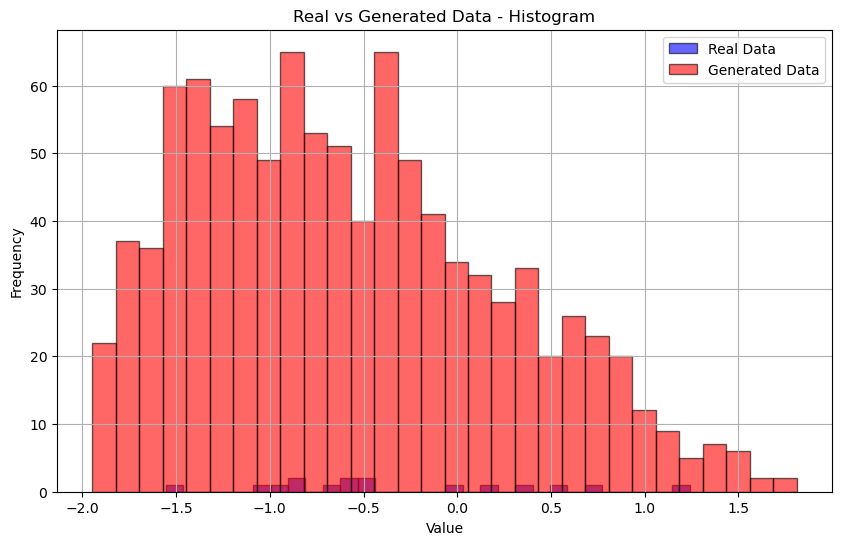

In [5]:
# Plot real vs synthetic data using histograms
plt.figure(figsize=(10, 6))

# Histogram for real data
plt.hist(real_data.flatten(), bins=30, label='Real Data', alpha=0.6, color='blue', edgecolor='black')

# Histogram for synthetic (generated) data
plt.hist(synthetic_data_rescaled.flatten(), bins=30, label='Generated Data', alpha=0.6, color='red', edgecolor='black')

plt.title('Real vs Generated Data - Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig("real_vs_generated_data_6.png", dpi=300)
plt.show()


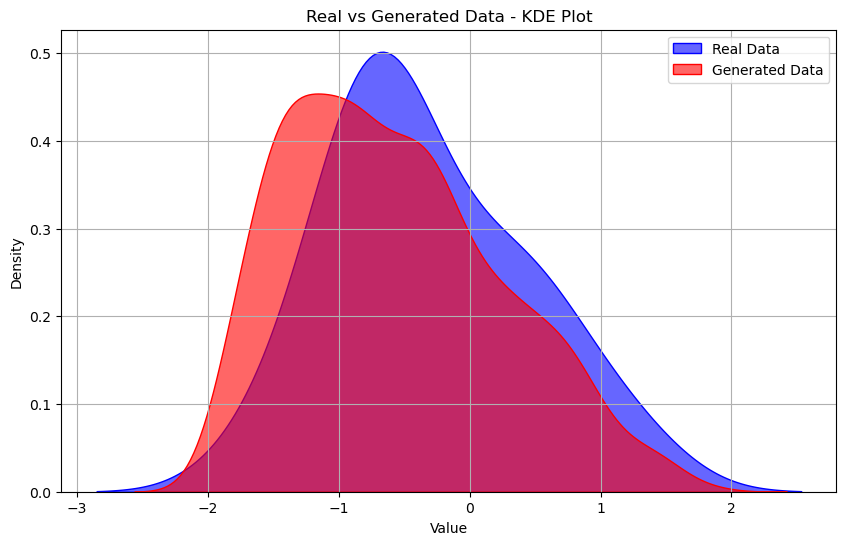

In [6]:
import seaborn as sns

# Plot real vs synthetic data using scatter plot with KDE
plt.figure(figsize=(10, 6))

# Scatter plot for real data
sns.kdeplot(real_data.flatten(), label='Real Data', color='blue', fill=True, alpha=0.6)

# Scatter plot for synthetic (generated) data
sns.kdeplot(synthetic_data_rescaled.flatten(), label='Generated Data', color='red', fill=True, alpha=0.6)

plt.title('Real vs Generated Data - KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig("real_vs_generated_data_7.png", dpi=300)
plt.show()


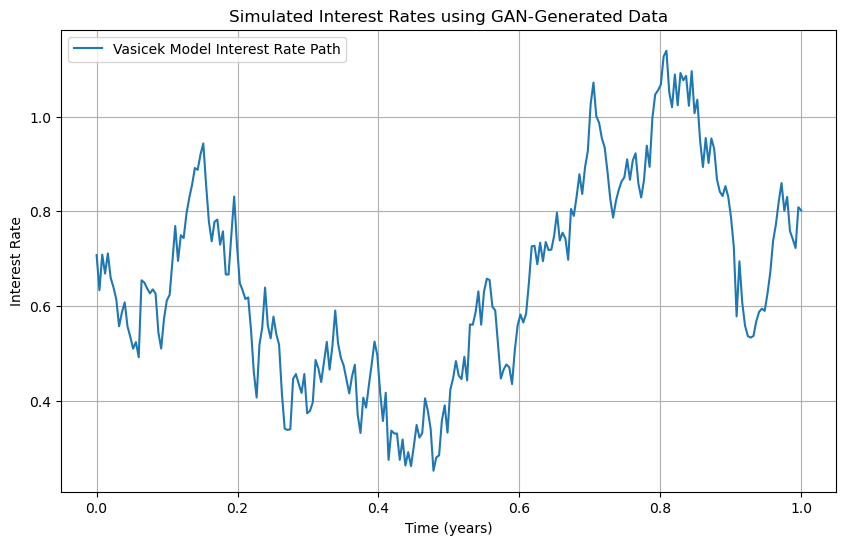

In [7]:
# Vasicek Interest Rate Model Simulation using GAN-generated data
import numpy as np
import matplotlib.pyplot as plt

# Check if GAN-generated data is available
if 'synthetic_data_rescaled' not in globals() or len(synthetic_data_rescaled) == 0:
    raise ValueError("GAN output 'synthetic_data_rescaled' is not available or empty.")

# Use GAN output to adjust parameters (e.g., use mean and variance of generated data)
r0 = synthetic_data_rescaled[0][0]  # Initial rate from first synthetic data point
theta = np.mean(synthetic_data_rescaled)  # Long-term mean rate
sigma = np.std(synthetic_data_rescaled)  # Volatility based on GAN data

# Vasicek model parameters
kappa = 0.15  # Speed of mean reversion
T = 1.0  # Time horizon (in years)
n_steps = 252  # Number of time steps (daily steps for 1 year)
dt = T / n_steps  # Time step size

# Initialize the interest rate array
rates = np.zeros(n_steps)
rates[0] = r0  # Starting rate from GAN output

# Simulate interest rates using the Vasicek model
for t in range(1, n_steps):
    dWt = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
    rates[t] = rates[t - 1] + kappa * (theta - rates[t - 1]) * dt + sigma * dWt

# Plot the simulated interest rate path
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, n_steps), rates, label='Vasicek Model Interest Rate Path')
plt.title('Simulated Interest Rates using GAN-Generated Data')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.savefig("vasicek_interest_rate_simulation_with_gan.png", dpi=300)
plt.show()


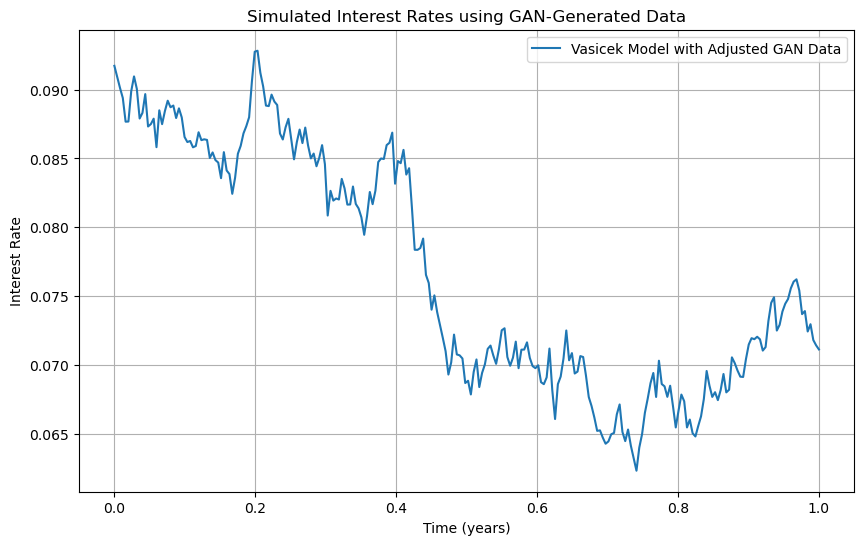

In [33]:
# Normalize synthetic data to a realistic range
current_mean = 0.06  # Current interest rate (6%)
desired_std = 0.02   # Volatility (2%)

synthetic_data_normalized = (synthetic_data_rescaled - np.mean(synthetic_data_rescaled)) / np.std(synthetic_data_rescaled)
synthetic_data_rescaled = synthetic_data_normalized * desired_std + current_mean

# Use the first synthetic data point as the initial rate
r0 = synthetic_data_rescaled[0][0]

# Vasicek parameters
theta = np.mean(synthetic_data_rescaled)  # Long-term mean rate
sigma = np.std(synthetic_data_rescaled)  # Volatility
kappa = 0.15
T = 1.0
n_steps = 252
dt = T / n_steps

# Simulate the Vasicek model
rates = np.zeros(n_steps)
rates[0] = r0
for t in range(1, n_steps):
    dWt = np.random.normal(0, np.sqrt(dt))
    rates[t] = rates[t - 1] + kappa * (theta - rates[t - 1]) * dt + sigma * dWt

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, n_steps), rates, label='Vasicek Model with Adjusted GAN Data')
plt.title('Simulated Interest Rates using GAN-Generated Data')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.savefig("adjusted_vasicek_interest_rate_simulation.png", dpi=300)
plt.show()


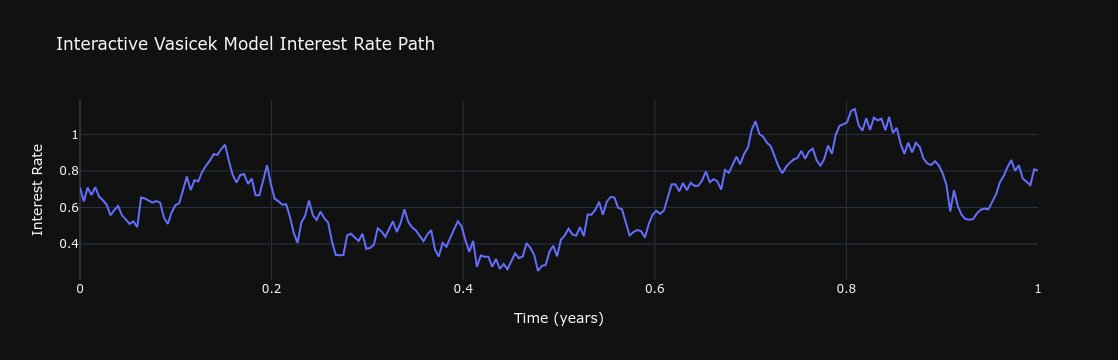

In [15]:
import plotly.graph_objects as go

# Interactive line chart for interest rates
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.linspace(0, T, n_steps), y=rates, mode='lines', name='Interest Rate'))
fig.update_layout(
    title='Interactive Vasicek Model Interest Rate Path',
    xaxis_title='Time (years)',
    yaxis_title='Interest Rate',
    template='plotly_dark'
)
fig.show()


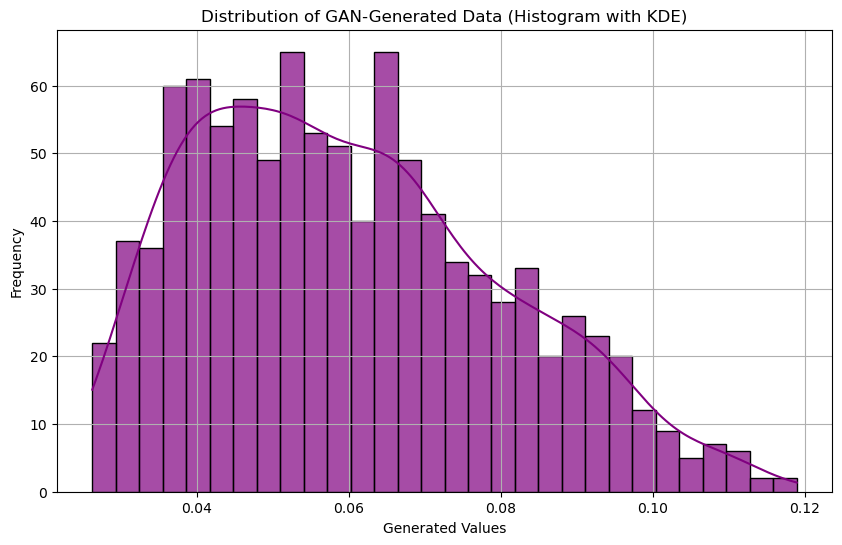

In [37]:
import seaborn as sns

# Histogram of generated synthetic data with KDE overlay
plt.figure(figsize=(10, 6))
sns.histplot(synthetic_data_rescaled.flatten(), kde=True, bins=30, color='purple', alpha=0.7)
plt.title('Distribution of GAN-Generated Data (Histogram with KDE)')
plt.xlabel('Generated Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("gan_data_distribution.png", dpi=300)
plt.show()


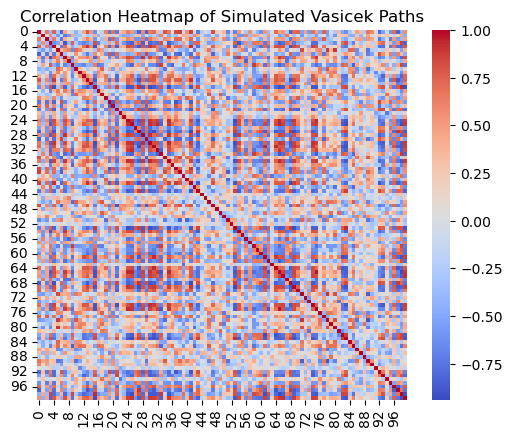

In [35]:
# Simulate multiple Vasicek paths for heatmap
n_simulations = 100
paths = np.zeros((n_steps, n_simulations))
for sim in range(n_simulations):
    rates_temp = np.zeros(n_steps)
    rates_temp[0] = r0
    for t in range(1, n_steps):
        dWt = np.random.normal(0, np.sqrt(dt))
        rates_temp[t] = rates_temp[t - 1] + kappa * (theta - rates_temp[t - 1]) * dt + sigma * dWt
    paths[:, sim] = rates_temp

# Plot heatmap of correlations
correlation_matrix = np.corrcoef(paths.T)
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Simulated Vasicek Paths')
plt.savefig("vasicek_correlation_heatmap.png", dpi=300)
plt.show()


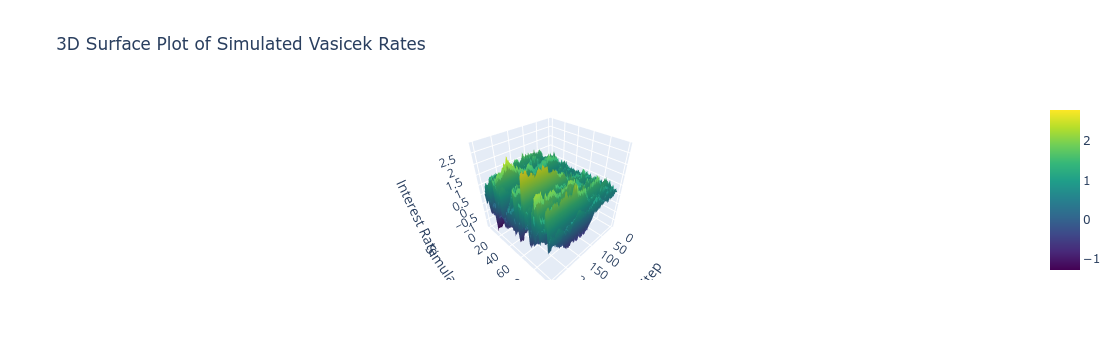

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plot
X, Y = np.meshgrid(range(n_steps), range(n_simulations))
Z = paths.T

# 3D Surface Plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])
fig.update_layout(
    title='3D Surface Plot of Simulated Vasicek Rates',
    scene=dict(
        xaxis_title='Time Step',
        yaxis_title='Simulation Index',
        zaxis_title='Interest Rate'
    )
)
fig.show()


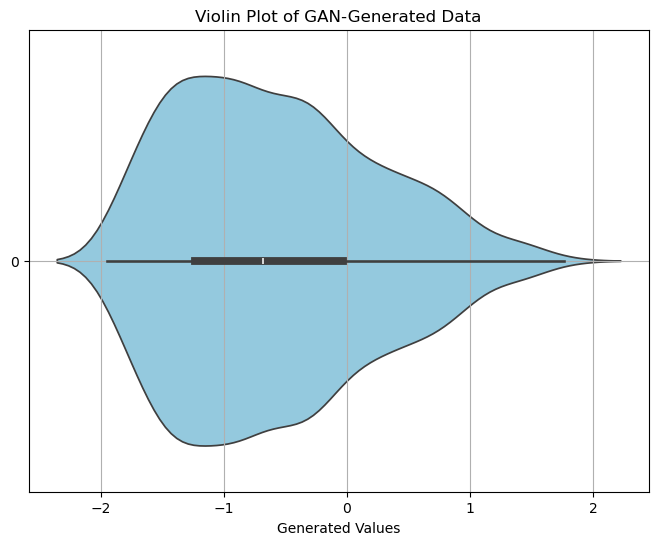

In [23]:
# Violin plot of GAN-generated data
plt.figure(figsize=(8, 6))
sns.violinplot(data=synthetic_data_rescaled, orient='h', color='skyblue')
plt.title('Violin Plot of GAN-Generated Data')
plt.xlabel('Generated Values')
plt.grid(True)
plt.savefig("gan_violin_plot.png", dpi=300)
plt.show()


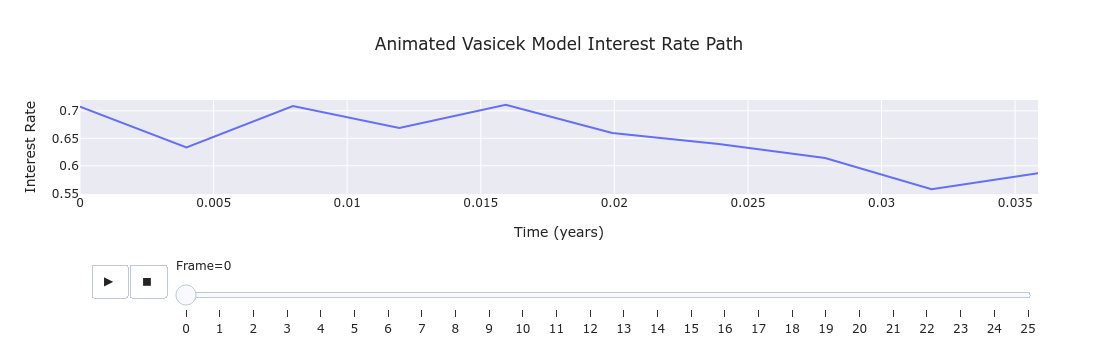

In [25]:
import plotly.express as px
import pandas as pd

# Prepare data for animation
df = pd.DataFrame({'Time': np.linspace(0, T, n_steps), 'Interest Rate': rates})
df['Frame'] = (df.index // 10).astype(int)  # Group for animation frames

# Animated line chart
fig = px.line(df, x='Time', y='Interest Rate', animation_frame='Frame', title='Animated Vasicek Model Interest Rate Path')
fig.update_layout(xaxis_title='Time (years)', yaxis_title='Interest Rate', template='seaborn')
fig.show()


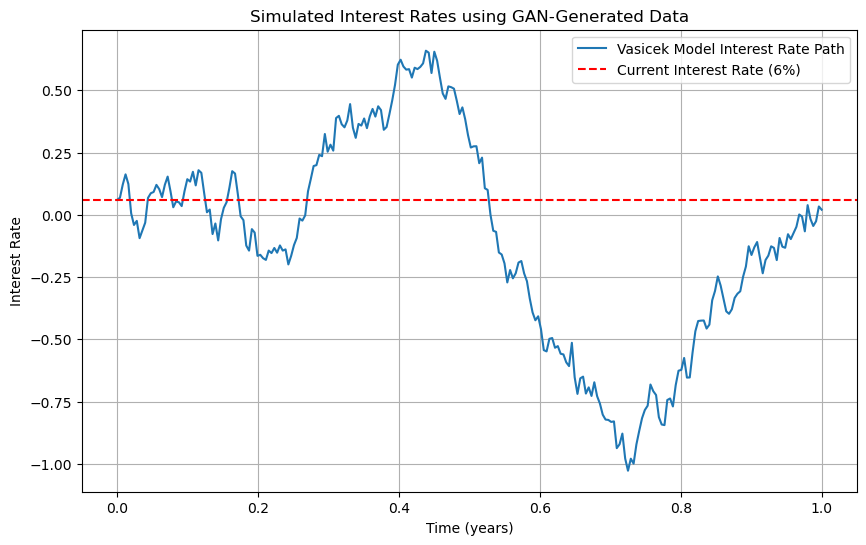

In [29]:
# Current interest rate assumption (e.g., 6%)
current_interest_rate = 0.06  # 6%

# Use GAN-generated data to adjust parameters
r0 = current_interest_rate  # Start from the current interest rate
theta = np.mean(synthetic_data_rescaled)  # Long-term mean rate (GAN-generated)
sigma = np.std(synthetic_data_rescaled)  # Volatility based on GAN data

# Vasicek model parameters
kappa = 0.15  # Speed of mean reversion
T = 1.0  # Time horizon (in years)
n_steps = 252  # Number of time steps (daily steps for 1 year)
dt = T / n_steps  # Time step size

# Initialize the interest rate array
rates = np.zeros(n_steps)
rates[0] = r0  # Start at the current interest rate

# Simulate interest rates using the Vasicek model
for t in range(1, n_steps):
    dWt = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
    rates[t] = rates[t - 1] + kappa * (theta - rates[t - 1]) * dt + sigma * dWt

# Plot the simulated interest rate path
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, n_steps), rates, label='Vasicek Model Interest Rate Path')
plt.axhline(current_interest_rate, color='red', linestyle='--', label='Current Interest Rate (6%)')
plt.title('Simulated Interest Rates using GAN-Generated Data')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.savefig("vasicek_interest_rate_simulation_with_gan_realistic.png", dpi=300)
plt.show()


In [31]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import Band, ColumnDataSource

# Prepare data
time = np.linspace(0, T, n_steps)
mean_rates = rates
upper_bound = mean_rates + 2 * sigma  # Confidence interval upper bound
lower_bound = mean_rates - 2 * sigma  # Confidence interval lower bound

# Bokeh visualization
source = ColumnDataSource(data=dict(time=time, rate=mean_rates, lower=lower_bound, upper=upper_bound))

# Create plot
p = figure(title="Simulated Interest Rates with Confidence Interval", 
           x_axis_label='Time (years)', y_axis_label='Interest Rate',
           width=800, height=400)

# Plot the mean rate
p.line('time', 'rate', source=source, legend_label="Mean Interest Rate", line_width=2, color="blue")

# Add confidence band
band = Band(base='time', lower='lower', upper='upper', source=source, level='underlay',
            fill_alpha=0.3, fill_color="lightblue")
p.add_layout(band)

# Add horizontal line for current interest rate
p.line(time, [current_interest_rate] * len(time), legend_label="Current Interest Rate", 
       line_width=2, color="red", line_dash="dashed")

# Finalize and display
p.legend.location = "top_left"
output_file("vasicek_interest_rate_bokeh.html")
show(p)
